# Regressão Logística

## Exemplo com dataset maior
No exemplo a seguir, vamos considerar o conjunto de dados denominado **Pima Indians Diabetes Database**. Esse dataset é frequentemente usado em tutoriais de aprendizado de máquina e contém dados sobre diagnósticos de diabetes em mulheres Pima Indianas.

Fonte: [UCI Machine Learning Repository - Pima Indians Diabetes Database](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

Inicialmente, vamos carregar os pacotes e, em seguida, fazer a leitura dos dados.

> **Observação:** Nesse exemplo, vamos "puxar" os dados de uma URL; poderíamos, perfeitamente, ter baixado os dados previsamente e carregado-os no Colab.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sn

In [2]:
# Carregar os dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Visualizar os dados
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Vamos dividir o conjunto de dados em dois conjuntos: as variáveis dependentes (matriz $X$) e as variávies dependentes (vetor $y$). Aqui, estamos considerando que a variável *Outcome* ("Resultado") é dependente das demais. De fato, queremos saber se, dadas todas as características listadas na base, a pessoa é ou não portadora de diabetes.

Em seguida, também vamos organizar os dados nos conjuntos de treino e de teste. Novamente, estamos utilizando a seguinte relação: $80\%$ do dataset para treino e $20\%$ para teste.

In [3]:
# Seleção de variáveis independentes e dependentes
# Essa função remove a coluna Outcome do dataset e atribui as demais à variável X
X = data.drop('Outcome', axis=1)

# Essa função atribui a coluna Outcome à variável y
y = data['Outcome']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos, nesse exemplo, comparar os dois tipos de regularização: a L2 (*ridge*) e a L1 (*lasso*). Inicialmente, treinaremos o modelo considerando o atributo `penalty=l2` e, em seguida, `penalty=l1`.

In [4]:
# Inicialização e treinamento do modelo com penalidade L2
model_l2 = LogisticRegression(penalty='l2', max_iter=200)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'Acurácia com penalidade L2: {accuracy_l2}')

Acurácia com penalidade L2: 0.7467532467532467


In [5]:
# Inicialização e treinamento do modelo com penalidade L1
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'Acurácia com penalidade L1: {accuracy_l1}')

Acurácia com penalidade L1: 0.7532467532467533


Note que houve uma pequena variação nos resultados. Vamos comparar os respectivos coeficientes e, finalmente, construir a matriz de confusão.

In [6]:
# Comparação dos coeficientes
coefficients_l2 = model_l2.coef_[0]
coefficients_l1 = model_l1.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({
    'Variável': feature_names,
    'Coeficiente L2': coefficients_l2,
    'Coeficiente L1': coefficients_l1
})

print(coef_df)

                   Variável  Coeficiente L2  Coeficiente L1
0               Pregnancies        0.064372        0.063795
1                   Glucose        0.034094        0.032276
2             BloodPressure       -0.013879       -0.014636
3             SkinThickness        0.003291        0.003029
4                   Insulin       -0.001803       -0.001618
5                       BMI        0.102608        0.094059
6  DiabetesPedigreeFunction        0.626886        0.547418
7                       Age        0.037097        0.034445


<Axes: xlabel='Predito', ylabel='Esperado'>

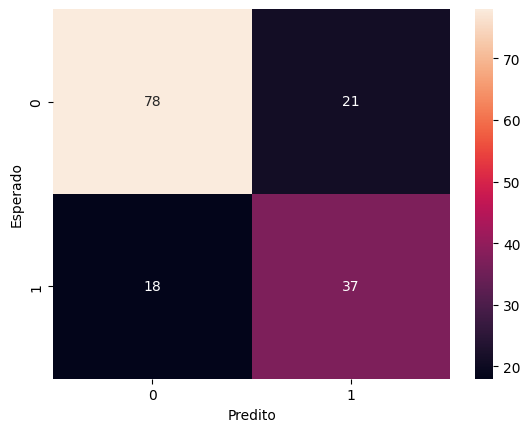

In [7]:
confusion_matrix_l2 = pd.crosstab(y_test, y_pred_l2, rownames=['Esperado'], colnames=['Predito'])
sn.heatmap(confusion_matrix_l2, annot=True)

<Axes: xlabel='Predito', ylabel='Esperado'>

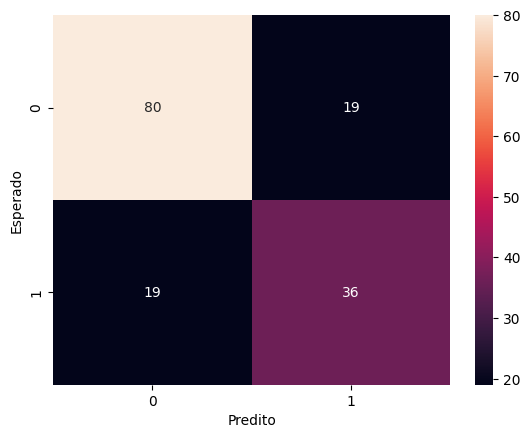

In [8]:
confusion_matrix_l1 = pd.crosstab(y_test, y_pred_l1, rownames=['Esperado'], colnames=['Predito'])
sn.heatmap(confusion_matrix_l1, annot=True)

# Exercício para Entrega

Escolha, ao menos, duas das bases a seguir. Em seguida, aplique os dois principais métodos que vimos nesta disciplina, ou seja, a Regressão Linear e a Regressão Logísitca.

Pode utilizar outras base de dados, caso deseje!

## Heart Disease Dataset
Este conjunto de dados contém informações sobre pacientes e é usado para prever a presença de doença cardíaca.

Fonte: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

## Breast Cancer Wisconsin (Diagnostic) Data Set
Este conjunto de dados contém características dos núcleos celulares presentes em imagens digitalizadas de aspirados de agulha fina de seios e é usado para diagnosticar o câncer de mama.

Fonte: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

## Bank Marketing Dataset
Este conjunto de dados é usado para prever se um cliente vai subscrever um depósito dentro do prazo.

Fonte: [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)



Bom trabalho! 🙂